In [1]:
# import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA,FastICA

import tensorflow as tf
np.random.seed(0)

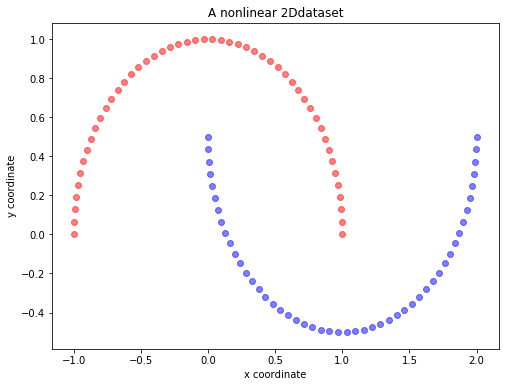

In [2]:
# Create the data and show
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

In [97]:
# create the class for kernel pca tf
class kpca:
    
    def __init__(self): pass
        
    def feedforward(self,input,n_components,gamma = 15):
        self.input = input
        self.distance_matrix = -2 * tf.matmul(input,tf.transpose(input)) + tf.reduce_sum(input**2,axis=1) + tf.reduce_sum(input**2,axis=1)[:,tf.newaxis]
        self.k = tf.exp(-gamma * self.distance_matrix)
        N = self.k.shape[0].value
        ones = tf.ones([N,N],dtype=tf.float64) / N
        self.center_k = self.k - tf.matmul(ones,self.k) - tf.matmul(self.k,ones) + tf.matmul(tf.matmul(ones,self.k),ones)
        self.eigval,self.eigvec = tf.linalg.eigh(self.center_k)
        self.small_eigvec = self.eigvec[:,-n_components:]
        return self.small_eigvec


In [98]:
# start the session and create a graph
# sess = tf.InteractiveSession()
kpca_layer = kpca()
x = tf.placeholder(shape = [100,2],dtype = tf.float64)
reduced = kpca_layer.feedforward(x,2,K)

(100, 2)


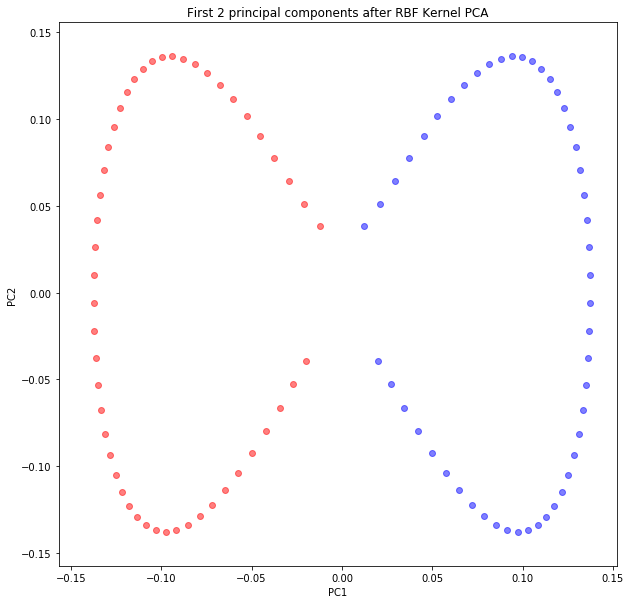

In [99]:
# get the results
X = X.astype(np.float64)
sess_results = sess.run(reduced,feed_dict={x:X})
plt.figure(figsize=(10,10))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

(100, 100)
93.14127025860304
0.9314127025860305
1.8840601168213813
------
-9.91863197124485
-0.0009918631971244849
0.09999508091600401
------
2.7755575615628914e-17
1.3877787807814457e-19
0.1


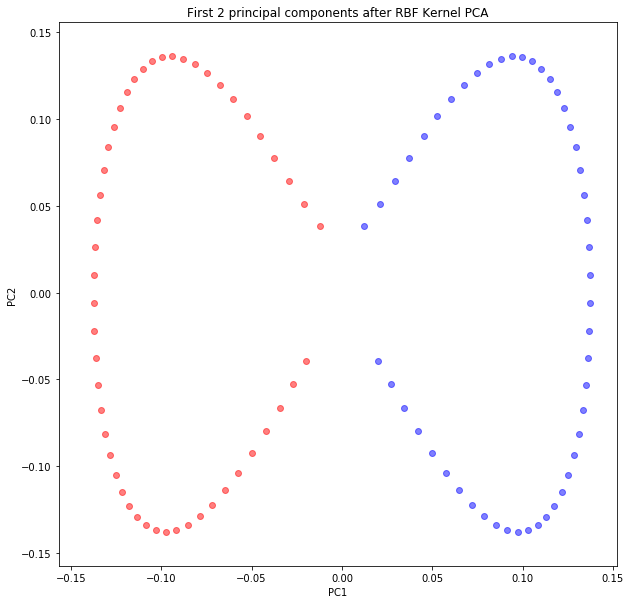

In [84]:
temp = X
sq_dists = pdist(temp, 'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
K = exp(-15 * mat_sq_dists)
N = K.shape[0]
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
eigvals, eigvecs = eigh(K)
print(eigvecs.shape)
X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,2+1)))

print(eigvals.sum())
print(eigvals.mean())
print(eigvals.std())
print('------')
print(eigvecs.sum())
print(eigvecs.mean())
print(eigvecs.std())
print('------')
print(X_pc.sum())
print(X_pc.mean())
print(X_pc.std())



plt.figure(figsize=(10,10))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

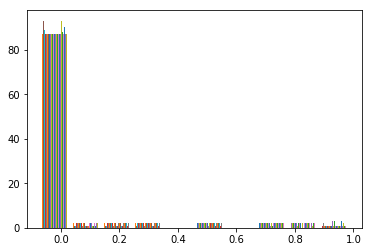

In [11]:
plt.hist(sess_results)
plt.show()

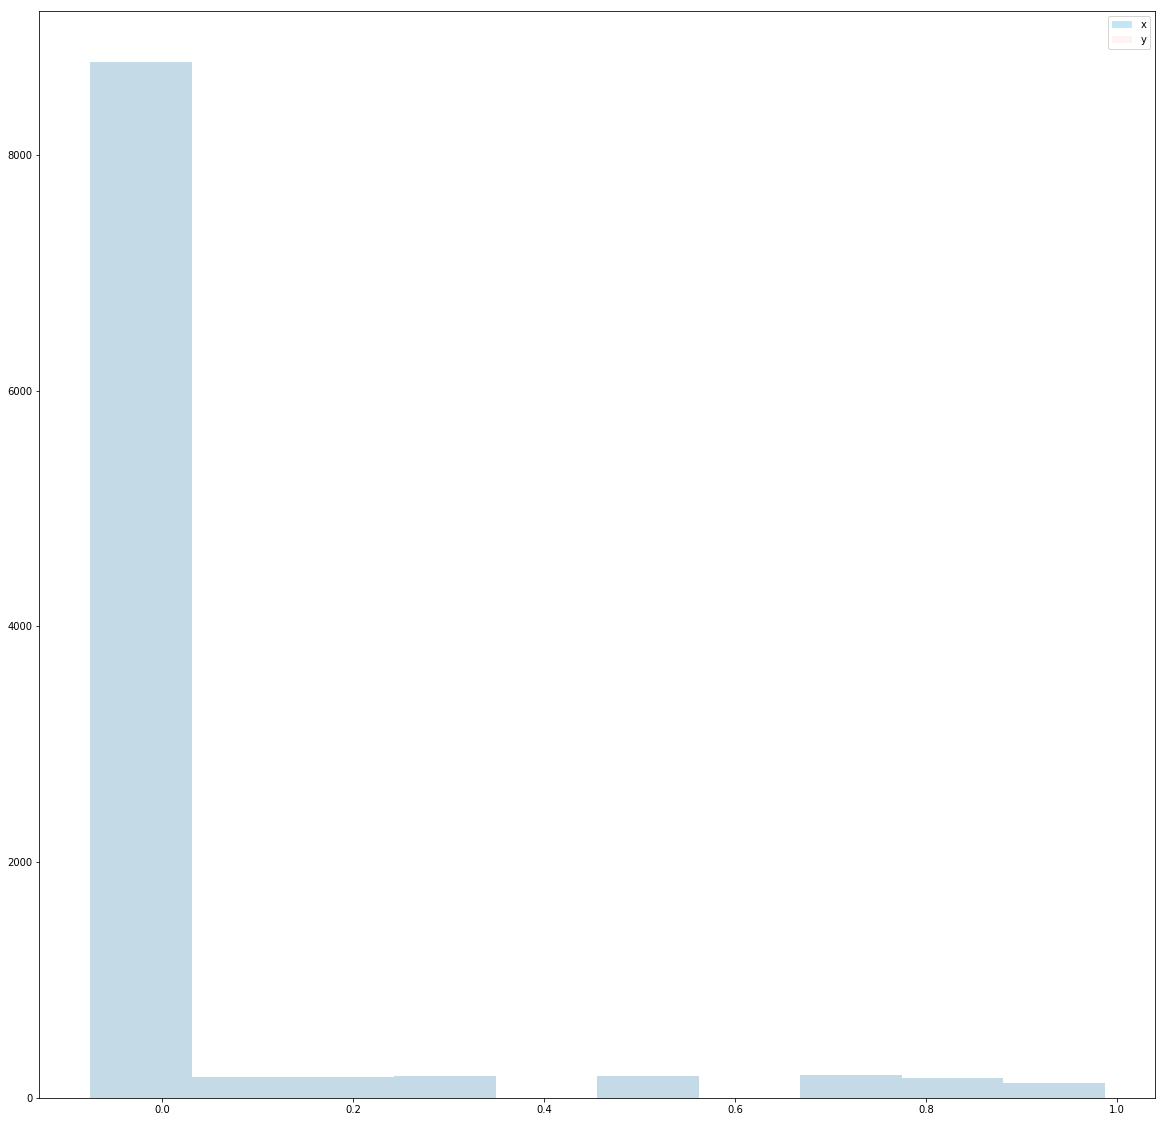

In [22]:
plt.figure(figsize=(20,20))
plt.hist(K.flatten(), alpha=0.5, label='x',color = "skyblue", lw=0)
plt.hist(sess_results.flatten(), alpha=0.05, label='y',color = "red", lw=0)
plt.legend(loc='upper right')
plt.show()